# Transfer Learning

Transfer learning is a machine learning technique that involves leveraging the knowledge gained from training a model on one task and applying it to another related task. Instead of starting the training process from scratch, transfer learning enables the model to benefit from the previously learned features or representations.

The basic idea behind transfer learning is that the features learned by a model on a large and diverse dataset can be generalized and useful for other similar tasks. By transferring this knowledge, models can achieve better performance and require less training time and data compared to training from scratch.

Transfer learning involves two main steps:

- **Pre-training:** A model is trained on a source task using a large dataset. This task is typically unrelated or indirectly related to the target task. The pre-training step enables the model to learn generic features or representations that capture useful patterns in the data.

- **Fine-tuning:** The pre-trained model is then used as a starting point for training on the target task. The model is further trained on a smaller, task-specific dataset related to the target task. During fine-tuning, the model's parameters are updated to adapt to the specifics of the new task while preserving the previously learned knowledge.

There are different ways to perform transfer learning, depending on the availability of data and similarity between the source and target tasks:

- **Feature Extraction:** In this approach, the pre-trained model's layers are frozen, and only the output layers are replaced or added for the target task. The pre-trained model serves as a feature extractor, and the new layers are trained to map the extracted features to the target task's specific classes or labels.

- **Fine-tuning:** In this approach, both the pre-trained model's layers and the new layers are trained together on the target task. The initial layers of the pre-trained model can be frozen, while the deeper layers closer to the task-specific layers are fine-tuned. This allows the model to adapt the previously learned features to the target task.

Transfer learning is especially beneficial in scenarios where:

- The target task has a limited amount of labeled data, as transfer learning can effectively leverage knowledge from a larger source dataset.
- The source and target tasks share some common underlying patterns or features, allowing the model to transfer relevant knowledge.
- Training a model from scratch on the target task would be computationally expensive or time-consuming.

By utilizing transfer learning, models can achieve improved performance, faster convergence, and reduced data requirements, making it a valuable technique in various machine learning applications.

**How is Transfer Lerning done in CNN Models?**

Transfer learning in CNNs (Convolutional Neural Networks) typically involves using a pre-trained CNN model as a starting point and adapting it to a new task. Here are the steps involved in transfer learning using CNNs:

- **Pre-trained Model Selection:** Choose a pre-trained CNN model that has been trained on a large and diverse dataset, such as ImageNet. Popular choices include YOLO, VGG, ResNet, Inception, or MobileNet. These models have learned general image features that can be applicable to a wide range of tasks.
- **Removing the Classifier:** Remove the fully connected layers (classifier) at the end of the pre-trained model. These layers are task-specific and need to be replaced with new layers suitable for the new task.
- **Feature Extraction:** Freeze the weights of the pre-trained layers to prevent them from being updated during training. These layers already contain valuable learned features, and freezing them allows the model to act as a feature extractor.
- **Adding New Layers:** Add new layers on top of the pre-trained layers. These new layers will be specific to the new task. The number of new layers and their architecture can vary based on the complexity of the task and the available data.
- **Training:** Train the model using the new task-specific dataset. The training is performed on the new layers while keeping the pre-trained layers frozen. Only the weights of the new layers are updated during training.
- **Fine-tuning (Optional):** If the new task dataset is large enough and similar to the original dataset used for pre-training, fine-tuning can be performed. In this step, the weights of the pre-trained layers closest to the new layers are unfrozen, allowing them to be further fine-tuned along with the new layers. This fine-tuning enables the model to adapt more specifically to the new task.
- **Evaluation and Testing:** Evaluate the performance of the trained model on a validation set. Adjust the hyperparameters and model architecture if necessary. Once satisfied with the model's performance, test it on unseen data to assess its generalization ability.

## Implementation of Transfer Learning


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

2024-11-28 08:11:33.283894: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-28 08:11:33.292954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732760793.303163  104007 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732760793.306122  104007 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 08:11:33.317135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# https://www.cs.toronto.edu/~kriz/cifar.html
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range of 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

[np.uint8(0), np.uint8(5), np.uint8(2), np.uint8(9), np.uint8(7), np.uint8(5)]


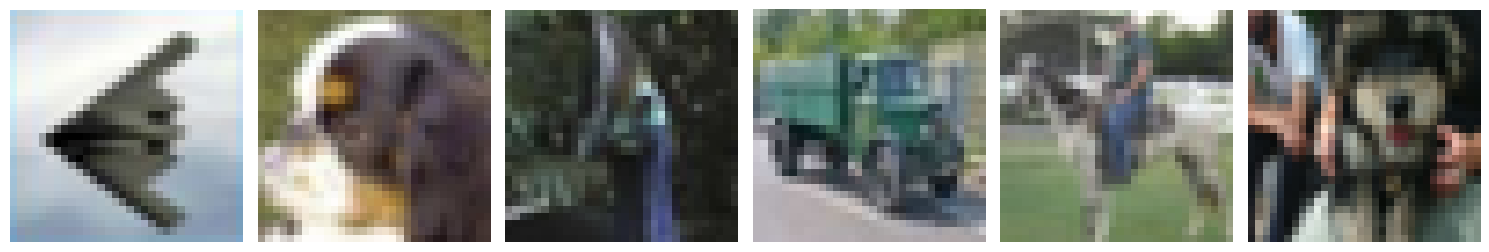

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(x_train), 6, replace=False)
selected_images = [x_train[i] for i in indices]
selected_label = [y_train[i][0] for i in indices]
print(selected_label)

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()


In [5]:
# Load the pre-trained VGG16 model (excluding the fully connected layers) and freeze its weights
base_model = VGG16(
    weights='imagenet', include_top=False, input_shape=(32,32,3)
)

I0000 00:00:1732760796.991049  104007 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4233 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
# Freeze the pre-trained weights
base_model.trainable = False

In [7]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# Build a custom classification model
model = Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_split=0.2)

Epoch 1/25


I0000 00:00:1732760802.605319  104137 service.cc:148] XLA service 0x718c8800e3c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732760802.605341  104137 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-28 08:11:42.627552: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732760802.738387  104137 cuda_dnn.cc:529] Loaded cuDNN version 90300


 26/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1279 - loss: 2.4270

I0000 00:00:1732760804.358514  104137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3745 - loss: 1.7645 - val_accuracy: 0.5378 - val_loss: 1.3178
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5291 - loss: 1.3439 - val_accuracy: 0.5698 - val_loss: 1.2257
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5573 - loss: 1.2721 - val_accuracy: 0.5830 - val_loss: 1.1852
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5729 - loss: 1.2247 - val_accuracy: 0.5929 - val_loss: 1.1690
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5850 - loss: 1.1959 - val_accuracy: 0.5982 - val_loss: 1.1501
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5907 - loss: 1.1642 - val_accuracy: 0.6018 - val_loss: 1.1497
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6000 - loss: 1.1471 - val_accuracy: 0.6069 - val_loss: 1.1306
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6072 - loss: 1.1274 - val_accuracy: 0.6030 - val

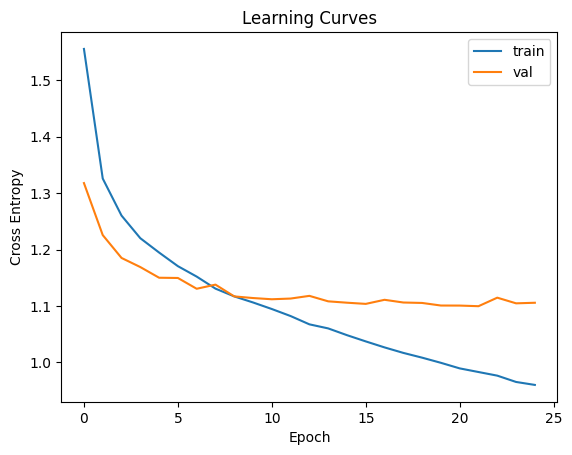

In [12]:
# Plot Learning Curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print("loss", loss)
print("accuracy", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6256 - loss: 1.0987
loss 1.1054238080978394
accuracy 0.6245999932289124


This process allows the model to leverage the pre-trained weights from VGG16 while training the added fully connected layers specifically for the CIFAR dataset. Feel free to modify the architecture or hyperparameters according to your needs.

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image

new_image = image.load_img("images.jpeg", target_size = (32,32))

new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

In [35]:
pred = model.predict(new_image)
pred_class = np.argmax(pred)
pred_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


np.int64(0)